<a href="https://colab.research.google.com/github/sunfishes/Data-Analysys-Programming-2/blob/main/dap_w6_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실습 준비

import pandas as pd
import numpy as np
import random

df_org = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df_org

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **1. 결측 데이터 처리**

---

실제 데이터를 다룰 때에는 데이터가 부분적으로 존재하지 않거나(결측), 비정상적인 값을 가지는(이상) 등 본격적인 분석작업에 들어가기 앞서 정리를 해야하는 경우가 아주 많습니다. <br><br>

1번 문제에서는 데이터가 부분적으로 부재한 경우인 결측 데이터를 다루는 방법을 연습합니다. <br><br>

이론 강의자료 및 교재 실습자료에는 결측치 여부를 확인할 때 `isnull()`을 사용하는 것으로 나와있습니다. `isnull()`은 `isna()`의 alias(바로가기 링크와 비슷하다고 생각하면 됩니다.)로, 용도 및 기능이 완전히 동일하나, 결측치를 다루는 다른 메서드(`dropna()`, `fillna()` 등)와 일관성을 유지하는 차원에서 `isna()`로 이용하는 것을 추천합니다. `notnull()` 또한 마찬가지로, `notna()`로 이용하는 것을 추천합니다.

---

[DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) <br>
[Series.isna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html) <br>
[DataFrame.notna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html) <br>
[Series.notna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.notna.html) <br>
[DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) <br>
[Series.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.dropna.html) <br>
[DataFrame.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) <br>
[Series.fillna()](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html)

In [ ]:
# 데이터 준비
df1 = df_org.copy(deep = True)

random.seed(42)
nantgt1 = random.sample(range(0, len(df_org)), 100)

df1.loc[nantgt1, 'Survived'] = np.nan

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     791 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [ ]:
# 1-1. 나이('Age')가 결측치인 row를 선택하세요.
df1[df1['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0.0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0.0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,NaN,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# 1-2. notna()를 이용해 선실('Cabin')이 실제 값인(즉, 결측치가 아닌) row를 선택하세요.
df1[df1['Cabin'].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,NaN,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# 1-3. isna()를 이용해 선실('Cabin')이 실제 값인(즉, 결측치가 아닌) row를 선택하세요.
df1[~df1['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,NaN,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# 1-4. 생존 여부('Survived')가 결측치인 row를 제거하세요. (inplace = False)
df1.dropna(subset = ['Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 1-5. 결측치를 가지는 column을 모두 제거하세요. (inplace = False)
df1.dropna(axis = 1)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [ ]:
# 1-6. 세 개 이상의 열에 결측치를 가지는 row를 모두 제거하세요. (inplace = False) ** dropna()의 thresh 파라미터를 확인하세요. **
df1.dropna(thresh = len(df1.columns) - 2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 1-7 나이('Age')의 결측치를 평균 나이로 대체하세요. (inplace = False)
df1['Age'].fillna(df1['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
# 1-8 생존 여부는 0/1로 "평균" 값을 가지지 않습니다. 생존 여부('Survived')의 결측치를 최빈값(mode)으로 대체하세요. (inplace = True)
# 최빈값은 여러개일 수 있음에 유의하세요. mode()는 Series를 반환합니다.
df1['Survived'] = df1['Survived'].fillna(df1['Survived'].mode()[0])

###### 아래는 수정하지 마세요.
print(df1['Survived'].value_counts())
df1.loc[nantgt1]

0.0    584
1.0    307
Name: Survived, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
654,655,0.0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
114,115,0.0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
25,26,0.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
759,760,0.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
281,282,0.0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,0.0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
623,624,0.0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
175,176,0.0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S


In [ ]:
# 1-9 선실('Cabin')은 문자열 데이터입니다. 선실의 결측치를 'N/A'라는 문자열으로 대체하세요. (inplace = False)
df1['Cabin'].fillna('N/A')

0       N/A
1       C85
2       N/A
3      C123
4       N/A
       ... 
886     N/A
887     B42
888     N/A
889    C148
890     N/A
Name: Cabin, Length: 891, dtype: object

## **2. 이상 데이터 처리**

---

이상값은 자료형 등에 따라 여러 방식으로 나타납니다. 0보다 크거나 같은 정수로 구성된 사람의 나이의 경우를 보면, 140세와 같이 일반적인 사람의 수명보다 월등히 큰 수치가 데이터에 포함되어 있거나, 31.7세, -20세와 같이 아예 있을 수 없는 값이 들어있기도 합니다. 문자열의 경우에는 더 복잡해지는데, 사람의 이름을 담은 데이터에 `'Yyyyyyy Xxxxxxx'`와 같이 비정상적인 이름이 들어있거나, 데이터를 수집하고 저장하는 과정에서 `'John\tDoe\r\n'`와 같이 특수문자가 처리되지 않고 문자열에 섞여있을 수도 있습니다. <br><br>

여기에서는 이론 강의에서 설명된, 수치로 구성된 데이터에서 이상값을 분별하는 간단한 방법인 IQR을 이용한 방법을 연습합니다. <br>

---

[IQR](https://en.wikipedia.org/wiki/Interquartile_range)

In [ ]:
# 데이터 준비
import matplotlib.pyplot as plt

df2 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv")
df2

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


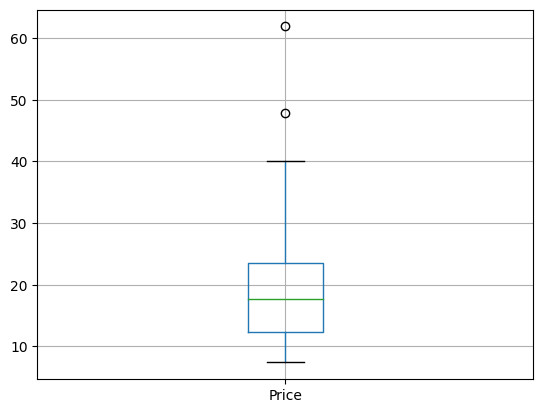

In [ ]:
box = df2.boxplot('Price')
box.plot()
plt.show()

In [ ]:
Q1 = df2['Price'].quantile(0.25)
Q3 = df2['Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# 2-1. 위 셀에 Q1, Q3, IQR이 주어져있습니다. 이론 자료의 기준에 따라(Q1, Q3로부터 IQR의 1.5배보다 더 떨어져있는 경우) 이상치를 선택하세요.
df2[df2['Price'] > Q3 + 1.5 * IQR]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
47,Infiniti,Q45,Midsize,45.4,47.9,NaN,17.0,22.0,NaN,Rear,...,5.0,200.0,113.0,72.0,42.0,29.0,15.0,4000.0,non-USA,Infiniti Q45
58,Mercedes-Benz,300E,Midsize,43.8,61.9,80.0,19.0,25.0,Driver & Passenger,Rear,...,5.0,NaN,110.0,69.0,37.0,NaN,15.0,3525.0,non-USA,Mercedes-Benz 300E


## **3. 그룹 분석**

---

그룹 분석은 여러 레코드가 공통 값을 가지는(즉, 대부분의 경우 Categorical) column의 값을 기준으로 레코드의 각 값을 집계하여 분석하는 방식입니다. <br><br>

Pandas에서 이는 `groupby()` 메서드를 이용해 수행할 수 있습니다. `groupby()`는 split -> apply -> combine 세 단계로 구성되며, split 단계에서는 명시한 column의 값을 공유하는 레코드끼리 주어진 DataFrame을 분리하고, apply 단계에서는 분리된 그룹에 각각 어떠한 작업을 수행하며, combine 단계에서는 분리된 그룹을 결합합니다. Combine 단계는 기본적으로 자동으로 수행되어, 최종적으로 DataFrame을 출력합니다. <br><br>

Apply 단계에는 분리된 그룹 각각이 마치 독립된 DataFrame처럼 취급되어, 지금까지 DataFrame에서 평균값을 이용해 이상치를 제거하거나, 결측치를 최빈값으로 채우거나, 각 레코드의 값을 버리고 그룹의 대표값(평균 등)을 계산하는 등 많은 응용이 가능합니다. 일반적으로 많이 사용되는 집계 함수는 자체적으로 제공하지만(아래 링크를 참조하세요.) 그 외의 경우에는 `agg()`에 메서드를 직접 정의하여 수행할 수 있습니다. <br>

---

[Group by](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation)

In [ ]:
df3 = df2.copy(deep = True)
df3

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


In [ ]:
# 3-1. 차량 분류('Type')별 모델 수를 집계하세요.
df3.groupby('Type').size()

Type
Compact    16
Large      11
Midsize    22
Small      20
Sporty     12
Van         9
dtype: int64

In [ ]:
# 3-2. 각 제조사('Manufacturer')의 차량 분류('Type')별 모델 수를 집계하세요.
df3.groupby(['Manufacturer', 'Type']).size()

Manufacturer  Type   
Acura         Small      1
Audi          Compact    1
              Midsize    1
BMW           Midsize    1
Buick         Large      2
                        ..
Volkswagen    Compact    1
              Small      1
              Sporty     1
              Van        1
Volvo         Compact    1
Length: 75, dtype: int64

In [ ]:
# 3-3. 에어백 분류('AirBags')별 가격('Price') 평균을 집계하세요.
df3.groupby('AirBags')['Price'].mean()

AirBags
Driver & Passenger    28.368750
Driver only           20.494595
None                  13.346875
Name: Price, dtype: float64

In [ ]:
# 3-4. 각 제조사('Manufacturer')가 제조한 차량 분류 집합을 집계하세요. agg()에 lambda식으로 집합을 생성하는 함수를 정의하여 해결하세요.
df3.groupby('Manufacturer').agg(lambda x: set(x))

,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Manufacturer,,,,,,,,,,,,,,,,,,,,,
Acura,{Integra},{Small},{12.9},{15.9},{18.8},{25.0},{31.0},{None},{Front},{4},...,{5.0},{177.0},{102.0},{68.0},{37.0},{26.5},{nan},{2705.0},{non-USA},{Acura Integra}
Audi,"{100, 90}","{Compact, Midsize}","{25.9, nan}","{37.7, 29.1}","{32.3, 44.6}","{19.0, 20.0}",{26.0},"{Driver only, Driver & Passenger}","{nan, Front}",{6},...,"{5.0, 6.0}","{193.0, 180.0}","{106.0, 102.0}","{67.0, nan}",{37.0},"{28.0, 31.0}","{17.0, 14.0}","{3405.0, 3375.0}",{non-USA},"{Audi 90, Audi 100}"
BMW,{535i},{Midsize},{nan},{30.0},{nan},{22.0},{30.0},{nan},{Rear},{4},...,{4.0},{186.0},{109.0},{69.0},{39.0},{27.0},{13.0},{3640.0},{non-USA},{BMW 535i}
Buick,"{Riviera, Roadmaster, Century, LeSabre}","{Large, Midsize}","{26.3, 19.9, 14.2, 22.6}","{26.3, 20.8, 23.7, 15.7}","{24.9, 17.3, 26.3, nan}","{16.0, 19.0, 22.0}","{25.0, 27.0, 28.0, 31.0}",{Driver only},"{Rear, nan, Front}","{6, 4}",...,"{5.0, 6.0}","{200.0, 189.0, 198.0, 216.0}","{108.0, 105.0, 116.0, 111.0}","{nan, 74.0, 69.0, 78.0}","{41.0, 42.0, 45.0}","{26.5, 28.0, 30.5}","{16.0, 17.0, 21.0, 14.0}","{4105.0, 3495.0, 3470.0, nan}",{USA},"{Buick Riviera, Buick LeSabre, Buick Century, ..."
Cadillac,"{Seville, DeVille}","{Large, Midsize}","{33.0, 37.5}","{40.1, 34.7}","{42.7, 36.3}",{16.0},{25.0},"{Driver only, Driver & Passenger}",{Front},{8},...,"{5.0, 6.0}","{204.0, 206.0}","{114.0, 111.0}","{73.0, 74.0}","{43.0, 44.0}","{35.0, 31.0}","{18.0, nan}","{3620.0, 3935.0}",{USA},"{Cadillac DeVille, Cadillac Seville}"
Chevrolet,"{Cavalier, Lumina_APV, Camaro, Lumina, Corsica...","{Sporty, Midsize, Large, Compact, Van}","{34.6, 8.5, 11.4, 13.4, 14.7, 18.0}","{38.0, 11.4, 13.4, 15.9, 16.3, 15.1, 16.6, 18.8}","{41.5, 11.4, 16.8, 18.0, 18.3, 18.4, 18.6, 19.6}","{nan, 15.0, 17.0, 18.0, 19.0, 25.0}","{34.0, 36.0, 20.0, 23.0, 25.0, 26.0, 28.0, 29.0}","{Driver only, nan, Driver & Passenger, None}","{Rear, nan, Front, 4WD}","{8, nan, 6, 4}",...,"{2.0, 4.0, 5.0, 6.0, 7.0, 8.0}","{193.0, 194.0, 178.0, 179.0, nan, 182.0, 214.0...","{96.0, 101.0, 103.0, 108.0, 110.0, 111.0, 116.0}","{66.0, 68.0, 71.0, 74.0, 77.0, 78.0}","{38.0, 39.0, 42.0, 43.0, 44.0, nan}","{33.5, 25.0, 26.0, nan, 28.5, 29.5, 30.5}","{nan, 13.0, 16.0, nan, 20.0, nan, nan}","{2785.0, 3715.0, 3910.0, 3240.0, 3380.0, 4025....","{USA, nan}","{Chevrolet Corsica, Chevrolet Lumina, Chevrole..."
Chrysler,"{LeBaron, Imperial}","{Large, Compact}","{29.5, 14.5}","{29.5, 15.8}","{17.1, 29.5}","{20.0, 23.0}","{26.0, 28.0}","{Driver only, Driver & Passenger}",{Front},"{6, 4}",...,{6.0},"{203.0, 183.0}","{104.0, 110.0}","{68.0, 69.0}","{41.0, 44.0}","{36.0, 30.5}","{17.0, 14.0}","{3570.0, 3085.0}",{USA},"{Chrysler LeBaron, Chrysler Imperial}"
Dodge,"{Shadow, Colt, Dynasty, Spirit, Caravan, Stealth}","{Sporty, Midsize, Compact, Small, Van}","{7.9, 8.4, 11.9, 14.8, 18.5, nan}","{9.2, 11.3, 13.3, 15.6, 19.0, 25.8}","{33.1, 10.6, 14.2, 14.7, 16.4, 24.4}","{nan, 17.0, 21.0, 22.0, 23.0, 29.0}","{33.0, nan, 21.0, 24.0, 27.0, 29.0}","{Driver only, None}","{Front, 4WD}","{nan, 6, 4}",...,"{4.0, 5.0, 6.0, 7.0}","{192.0, 172.0, 174.0, 175.0, 180.0, 181.0}","{97.0, 98.0, 104.0, 105.0, 112.0}","{66.0, 67.0, 68.0, 69.0, 72.0, nan}","{32.0, 38.0, 39.0, 40.0, 42.0}","{26.5, 20.0, 30.5, nan}","{nan, nan, 11.0, 16.0, nan}","{3080.0, 2670.0, 3705.0, 2970.0, 3805.0, 2270.0}",{USA},"{Dodge Spirit, Dodge Dynasty, Dodge Colt, Dodg..."
Eagle,"{Summit, Vision}","{Large, Small}","{nan, 7.9}","{19.3, 12.2}","{16.5, 21.2}","{20.0, 29.0}","{33.0, 28.0}","{Driver & Passenger, None}",{Front},"{6, 4}",...,"{5.0, 6.0}","{202.0, 174.0}","{113.0, 98.0}","{66.0, 74.0}","{40.0, 36.0}","{26.5, 30.0}","{11.0, 15.0}","{3490.0, 2295.0}",{USA},"{Eagle Vision, Eagle Summit}"


## **4. 중복 데이터 처리**

---

모종의 이유(보통은 오류)로 무조건 고유해야만 하는 값이 여러 번 나타나는 경우가 있습니다. 예를 들어, 주민번호를 고유값으로 이용한 데이터셋이 있을 때, 서로 다른 인적사항을 보유하지만 동일한 주민번호를 가진 레코드가 둘 나타난 경우, 새로운 고유값을 부여하거나 두 레코드 중 하나만을 선택하는 등의 작업이 필요합니다. <br><br>

Pandas에서는 DataFrame 내에서 중복값을 처리하기 위해 두 가지 메서드를 제공합니다. `duplicated()`는 중복 여부에 따른 boolean Series를 반환해 여타 작업에 이용할 수 있도록 하고, `drop_duplicates()`는 `drop()`과 `duplicated()`를 연동하여 이용한 것과 같이, 중복된 레코드를 제거한 DataFrame을 반환합니다.

---
[DataFrame.duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) <br>
[DataFrame.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [99]:
df4 = df_org.copy(deep = True).dropna(subset = ['Cabin'])
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [100]:
# 4-1. 성별('Sex') 중복값을 첫 값만 남기고 전부 제거하세요. (row-wise)
df4.drop_duplicates(['Sex'], keep = 'first')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [104]:
# 4-2. 나이('Age')가 전체 데이터셋에서 한 번만 나타나는(즉, 중복되지 않는) row들만을 남기고, 중복되는 row들을 전부 제거하세요.
row = df4['Age'].value_counts()
data = row[age == 1].index
df4[df4['Age'].isin(data)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
331,332,0,1,"Partner, Mr. Austen",male,45.50,0,0,113043,28.5000,C124,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S


## **5. 데이터 재구조화**

---

목적에 따라 DataFrame의 값은 유지하되 구조를 변경해야하는 경우가 존재합니다. 예를 들어, 어느 고객이 어느 영화를 보았다는 데이터가 `{고객 id : 영화 id}`와 같은 구성을 가지고, 이 데이터를 이용해 어떠한 기계학습 모델을 돌리고자 한다면 이를 딕셔너리와 같은 꼴을 가지도록 하는 것이 아니라, 행렬로 변환해 보았으면 1, 그렇지 않으면 0을 가지도록 해야할 수 있습니다. <br>

---
[Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html)

In [ ]:
df5 = df_org.copy(deep = True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 5-1. 등급('Pclass'), 승선항('Embarked')에 대해 원-핫 엔코딩을 적용하세요.
pd.get_dummies(df5, columns=['Pclass', 'Embarked'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0,1,0,0


In [ ]:
pd.crosstab(df5['Pclass'], df5['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
# 5-2. 위 셀에는 df5를 이용해 구성된 crosstab이 주어져 있습니다. pd.pivot_table()을 이용해 동일한 테이블이 출력되도록 하세요.
pd.pivot_table(df5, index='Pclass', columns='Survived', aggfunc='size', fill_value=0)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
# 5-3. 5-2의 테이블과 동일한 분류를 이용해, 빈도('size') 대신 나이('Age') 중앙값을 집계한 테이블을 출력하세요.
pd.pivot_table(df5, index='Pclass', columns='Survived', values='Age', aggfunc='median', fill_value=0)

Survived,0,1
Pclass,,
1,45.25,35
2,30.50,28
3,25.00,22
